In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, t

## T-Test - Two Independent Samples
- Created by: **Bahy Helmi Hartoyo Putra**
- Source: **Statistics for the Behavioral Sciences Ninth (9th) Edition by Frederick J. Gravetter and Larry B. Wallnau**

### Objective(s)
- Evaluate mean differences of **Mid Term Score** between two different **learning style** in a school.
- The two different treatments (learning styles) done are:
    - **Experiment-Based Learning**
    - **Reading-Based Learning**
- Define wether mean difference is **significant**.

### Load Dataset

In [3]:
# Dummy dataset with n=10
dataset = pd.DataFrame({"experiment-based": [86, 87, 91, 97, 98, 99, 97, 94, 89, 92],
                        "reading-based": [90, 89, 82, 83, 85, 79, 83, 86, 81, 92]})

In [5]:
dataset.head()

,experiment-based,reading-based
0,86,90
1,87,89
2,91,82
3,97,83
4,98,85


### #1: Define Hypothesis

μ1 = Experiment-based population mean
<br>
μ2 = Experiment-based population mean
<br>
H<sub>0</sub>: μ1 - μ2 = 0
<br>
H<sub>1</sub>: μ1 - μ2 ≠ 0
<br>

### #2: Find Critical Region

In [20]:
# Pre-requisites parameter
alpha_level = 0.01
df1 = len(dataset['experiment-based']) - 1
df2 = len(dataset['reading-based']) - 1
df = df1 + df2

In [29]:
# Locate the t-statistic critical region, two-tail
t_stats = round(t.ppf(1-(alpha_level/2), df), 3)
t_stats

2.878

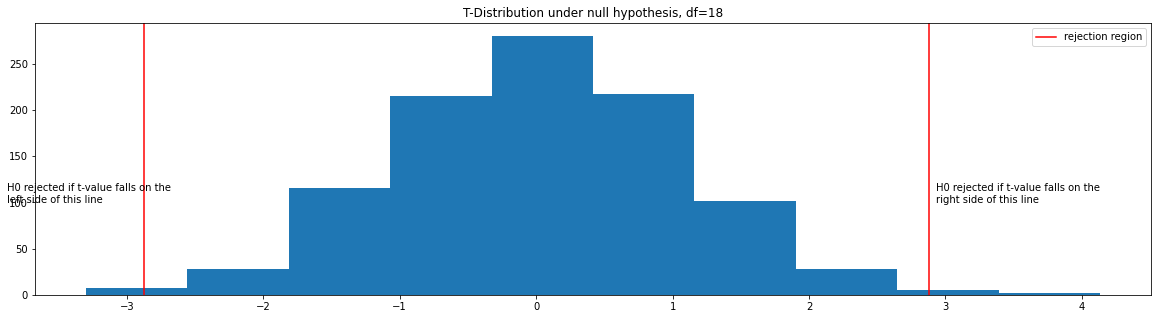

In [49]:
# Locate the rejection region
t_distribution = t.rvs(df, size=1000)

plt.figure(figsize=(20,5))

plt.hist(t_distribution)
plt.axvline(t_stats, c='red', label='rejection region')
plt.axvline(t_stats-(2*t_stats), c='red')

plt.text(t_stats+0.05, y=100, s="H0 rejected if t-value falls on the \nright side of this line")
plt.text(t_stats-(2*t_stats)-1, y=100, s="H0 rejected if t-value falls on the \nleft side of this line")

plt.title("T-Distribution under null hypothesis, df=18")
plt.legend()
plt.show()

### #3: Calculate t-value

In [50]:
# Calculate t_value
t_value, p_value = ttest_ind(dataset['experiment-based'], dataset['reading-based'])

In [51]:
t_value

4.0

### #4: Locate t-value

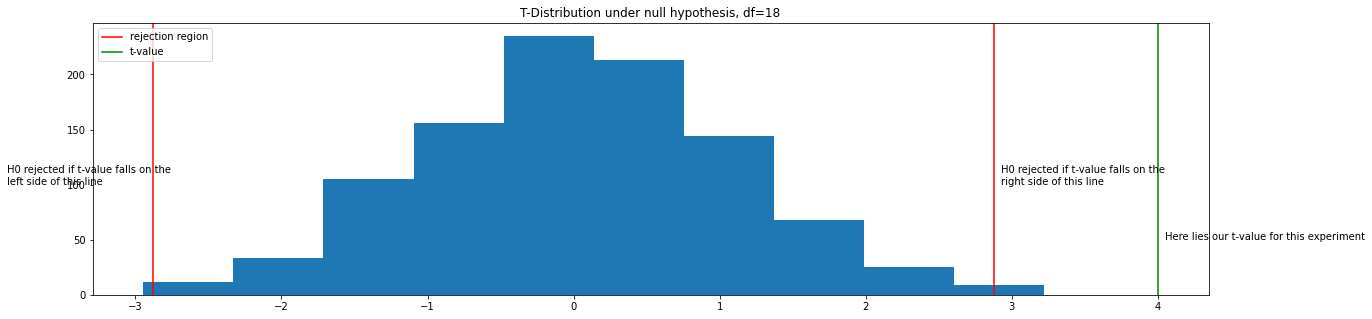

In [63]:
# Locate the rejection region
t_distribution = t.rvs(df, size=1000)

plt.figure(figsize=(20,5))

plt.hist(t_distribution)
plt.axvline(t_stats, c='red', label='rejection region')
plt.axvline(t_stats-(2*t_stats), c='red')
plt.axvline(t_value, c='green', label='t-value')

plt.text(t_stats+0.05, y=100, s="H0 rejected if t-value falls on the \nright side of this line")
plt.text(t_stats-(2*t_stats)-1, y=100, s="H0 rejected if t-value falls on the \nleft side of this line")
plt.text(t_value+0.05, y=50, s="Here lies our t-value for this experiment")

plt.title("T-Distribution under null hypothesis, df=18")
plt.legend(loc='upper left')
plt.show()